## Final Project Submission


* Student name: Edmund Motari Nyaribo
* Student pace: full time - Hybrid
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL: 


# MOVIE DATA ANALYSIS FOR MICROSOFT MOVIE STUDIO

## Business Understanding
Microsoft, a big Tech. company has seen all the big companies creating original video content, and wants to expand its scope into creation of video content like the other companies.They have decided to create a new movie studio, but they know so little about movie creation. <br/>
We are now tasked with the responsibility to explore the box office and check which films are currently at the top. Afterwards we are required to recommend viable insights to Microsoft, for its new movie studio based on the findings we have gotten, to help them in their movie production.

### QUESTIONS/ HYPOTHESIS TRYING TO SOLVE

 1. Which genres of movies having a high rating should Microsoft venture into their production?

 2. How much should Microsoft budget in the production of the movies? The correlation between the production budget 
    and the domestic and worldwide gross amounts

 3. Which month should the movies be released in order to be popularity?

## Data Understanding
The Data we are going to use in our data exploration is contained in two csv files and a database file contained in the zippedData folder. The database file also has several tables but we are only interested in two tables.
 1. `tn.movie_budgets.csv` : Contains information about the movies produced with their production budget, domestic gross and worldwide gross estimates.
 2. `tmdb.movies.csv` : This dataset contains general information about the movies produced such as original_title, release date, popularity, etc.
 3. `im.db` : This is an SQLite database containing the tables movie_basics and movie_ratings which are of most importance.
 
This data may not be upto date as of this time currently.

### Importing the necessary python libraries to be used

In [34]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the datasets to be used in the analysis
For reading csv files we use pd.read_csv('filename').


In [35]:
# Reading from Movie budgets
movieBudget = pd.read_csv('zippedData/tn.movie_budgets.csv')
movieBudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [36]:
# Reading from Movie dataset
movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### Reading from an SQLite database
We first need to connect to the database in order to be able to access the data.

In [37]:
# connecting to the database
conn = sqlite3.Connection('zippedData/im.db')

We use pd.read_sql() to read data from the table in the database and puts the query results in a dataframe format

In [38]:
# reading from the movie_basics table
q1 = """
SELECT * FROM movie_basics; """
pd.read_sql(q1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [39]:
# reading from the movie_ratings table
q2 = """
SELECT * FROM movie_ratings; """
pd.read_sql(q2, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [40]:
# JOINING both the movie_basics table and the movie_ratings table using the movie_id column
q3 = """
SELECT * FROM movie_basics
JOIN movie_ratings USING('movie_id'); """
q3_df = pd.read_sql(q3, conn)
q3_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


## Handling the Hypothesis

### Hypothesis 1: Which genres of movies having a high rating should Microsoft venture into their production?

For this Hypothesis, I will be making use of the SQL database provided 'movie_ratings' and 'movie_basics' tables.

I have joined the two tables into a single table in order to get an overall view of each movie with all of its attributes, making it easier to manipulate the data from a single data table.

In [41]:
# An already joined dataframe of both of the tables
q3_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


### Hyp1: Data Cleaning
Before we start our analysis, we need to get a feel of the data we are dealing with, columns present, their attributes, data types and also the number of rows present.
We use the .info() function to check for information about our dataset

In [42]:
# Checking for the general information about the dataframe
q3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


#### Drop the missing Values
From the .info(), we can see that there are missing values in the 'runtime_minutes' column and the 'genres' column.
In order to handle the missing values, I choose to drop the null values in the 'genres' column because its one of the columns that we are to use in our analysis.

In [43]:
q3_df.dropna(subset=['genres'], inplace=True)
q3_df.info()    # checking if the records have been dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


### Hyp1: Data Exploration and analysis
Now we are to do our analysis using the 'genres' column and the 'averagerating'.
I decided to group the dataset using the values 'genres' column then getting the mean of the 'averagerating' for each movie genre.

In [44]:
res = q3_df.groupby(['genres'])     # Grouping by the Genres column
genreAvgRating = res['averagerating'].mean()    # Calculating the mean of each group
sortedAvgs = genreAvgRating.sort_values(ascending=False)    # Sorting the average rating in Descending order
sortedAvgs

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Game-Show                     9.0
Music,Mystery                 9.0
                             ... 
Crime,Music                   2.4
Adventure,Crime,Romance       2.3
History,Sci-Fi,Thriller       2.3
Adult,Horror                  2.0
Comedy,Musical,Sport          1.4
Name: averagerating, Length: 923, dtype: float64

### Hyp1: Data Visualization
Now we need to plot the 'genres' against the 'averagerating' in order to visualize the relationship between the two columns. I opted to use a bar graph since its easily comprehendable by the everyone.

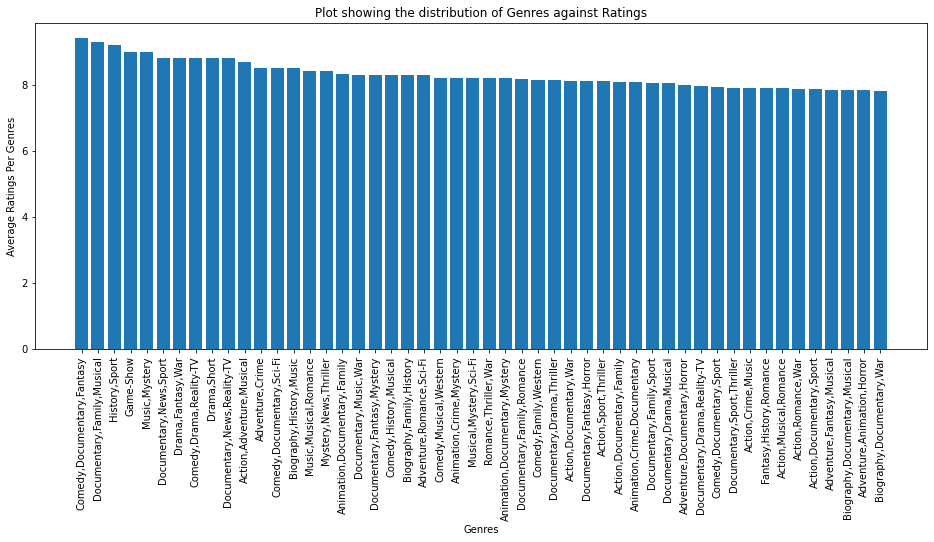

In [53]:
# Set up plots
fig, ax1 = plt.subplots(figsize=(16, 6))

# Create variables for easier reuse
top_5_counts = sortedAvgs.iloc[:50]   # Limited the no of values to plot to 50 due to the size of the dataset

ax1.bar(top_5_counts.index, top_5_counts.values)
ax1.tick_params(axis="x", labelrotation=90);
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Ratings Per Genres')
ax1.set_title('Plot showing the distribution of Genres against Ratings');

### Hyp1: Derived Solution
From the Graph above, we can see tha there is a clear show in which movie genre has recieved the highest ratings. 
This will guide Microsoft in selecting which movie genre  is preferred by the public and focus on those genres for
the people.

## Hypothesis 2: How much should Microsoft budget in the production of the movies? The correlation between the production budget and the domestic and worldwide gross amounts

For this question our objective is to find out if there will be realistic returns in terms of finances if they agree to get serious with the movie production business. For this analysis we will be working with the movie_budget dataframe. The 'production_budget', 'domestic_gross' and 'worldwide_gross' columns will be of most importance in our analysis.
We will then check for the correlation coeffecient of the production budget and the domestic and worldwide gross to see if the returns are motivating enough.

In [46]:
# Checking for missing data in the movieBudget dataframe
movieBudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Hyp2: Data Cleaning

In [47]:
movieBudget['production_budget'].head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

In [48]:
movieBudget['domestic_gross'].head()

0    $760,507,625
1    $241,063,875
2     $42,762,350
3    $459,005,868
4    $620,181,382
Name: domestic_gross, dtype: object

In [50]:
movieBudget['worldwide_gross'].head()

0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object

From the cell above, we notice that the float values in the 'production_budget', 'domestic_gross' and 'worldwide_gross' have appended a dollar sign and also used commas to delimite their values. If we use these values as they are, manipulating the data will be quite uneasy. We need to remove the appended "$" and the "," in order to work with purely float values.

In [16]:
# Replace "," and "$" signs to remain with purely float values
movieBudget['production_budget'] = movieBudget['production_budget'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)
movieBudget['domestic_gross'] = movieBudget['domestic_gross'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)
movieBudget['worldwide_gross'] = movieBudget['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

### Hyp2: Data Visualisation
Now that the data is cleaned and ready to be used, we now need to visualize the relationship between 'production_budget' and 
'domestic_gross'.

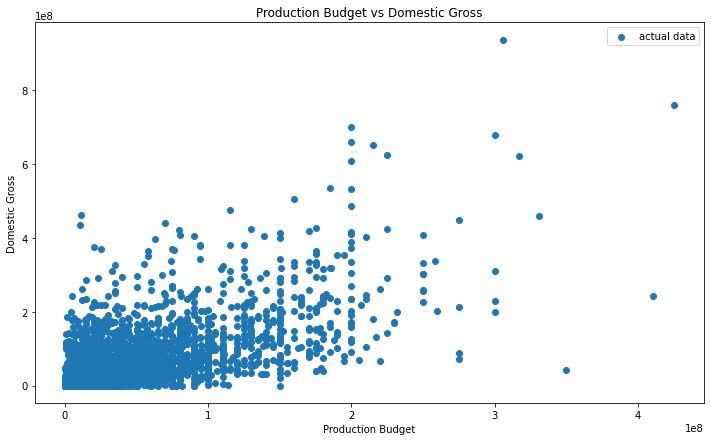

In [17]:
fig, ax = plt.subplots(figsize = (12,7))

x = movieBudget['production_budget']
y = movieBudget['domestic_gross']

ax.scatter(x, y, label="actual data")

#ax.plot(x, y, "--", label="perfect correlation")

ax.set_title("Production Budget vs Domestic Gross")
ax.set_xlabel("Production Budget")
ax.set_ylabel("Domestic Gross")

ax.legend();

The scatter plot visualization shows that there is somehow a positive relationship between the production budget and the domestic gross.
This visualization is not brought about clearly enough, so we need to get the correlation coeffecient in order to get the numbers to back up our visualization.

#### Calculating the correlation coefficient

In [18]:
# Calculating the correlation coefficient between production budget and domestic gross
correlation_matrix = np.corrcoef(movieBudget['production_budget'], movieBudget['domestic_gross'])
correlation_matrix[0][1]

0.6856818396752725

As we can see, there is a Moderate Positive Relationship of 0.686 between the production budget and the domestic gross.

We then do the same for the worldwide gross and production budget

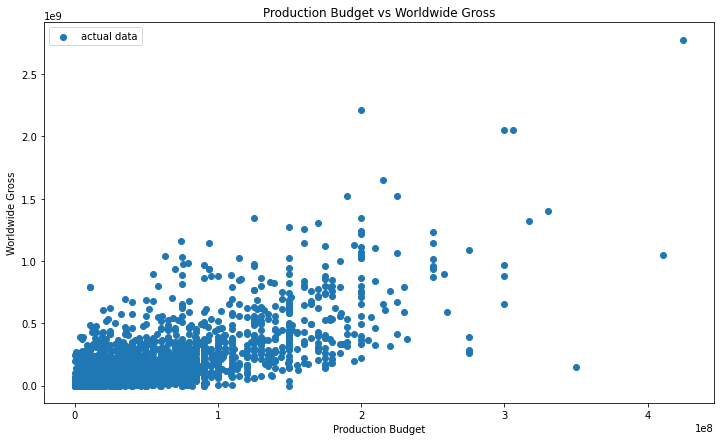

In [19]:
fig, ax = plt.subplots(figsize = (12,7))

x = movieBudget['production_budget']
y = movieBudget['worldwide_gross']

ax.scatter(x, y, label="actual data")

ax.set_title("Production Budget vs Worldwide Gross")
ax.set_xlabel("Production Budget")
ax.set_ylabel("Worldwide Gross")

ax.legend();

In [20]:
# Calculating correlation coeffecient for production budget and worldwide gross
correlation_matrix = np.corrcoef(movieBudget['production_budget'], movieBudget['worldwide_gross'])
correlation_matrix[0][1]

0.7483059765694748

We can see from the results above, that there is a high positive relationship of, 0.748, between the production budget and the worldwide gross.

### Hyp2: Finding
There is clearly a moderate to strong positive relationship about the cost of production and the gross returns the movie would generate. Hence a higher realistic budget will yield higher gross both in the domestic and worldwide market.

## Hypothesis 3: Which release month is best in order to increase the movie's popularity
we would also like to advice Microsoft on which month will be more convinient to do a movie release so that it becomes more popular. For this analysis we need the data from the movies Dataframe, specifically the 'popularity' column and 'release_date' column.
### Hyp3: Data Cleaning

In [21]:
# Getting information regarding the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


#### Convert the 'release_date' column into date datatype
There is just one thing we need to change based on the information we have. We need to convert the 'release_date' column to date datatype. This will enable us to extract the month from the date in order to group our data.
First we need to group the data according to the month.
Afterwards, we then get the mean of the popularity values and we will get to see which movie release month yields the highest popularity

In [22]:
dates = pd.to_datetime(movies['release_date'])   # Converting the release_date column to 'date' datatype
movies['release_month'] = dates.dt.month_name()  #  Extracting the month from the dates and adding it to a new column
res3 = movies.groupby(movies['release_month'])   #  Grouping the data based on the month released
avgPopularity = res3['popularity'].mean()    #  Getting the average popularity based on the month
avgPopularity

release_month
April        2.784293
August       3.580677
December     3.922681
February     3.352600
January      2.180176
July         3.585265
June         3.043683
March        3.052933
May          3.123663
November     3.459795
October      3.081957
September    3.265490
Name: popularity, dtype: float64

### Hyp3: Data Visualization
From the result above, we can notice that the month showing the highest popularity of a movie is December. We  then can visualize the data represented above using a bar chart for easier comprehension

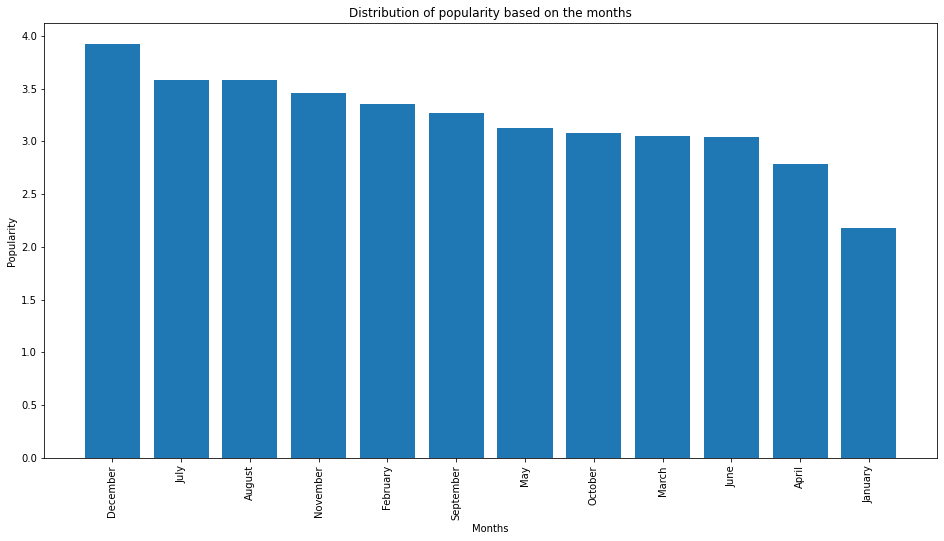

In [54]:
# Set up plots
fig, ax2 = plt.subplots(figsize=(16, 8))

# Create variables for easier reuse
#value_counts = genreAvgRating["genres"].value_counts()
sortedPopularity = avgPopularity.sort_values(ascending=False)

ax2.bar(sortedPopularity.index, sortedPopularity.values)
ax2.tick_params(axis="x", labelrotation=90);
ax2.set_xlabel('Months')
ax2.set_ylabel('Popularity')
ax2.set_title('Distribution of popularity based on the months');

## Hyp3: Findings
From our analysis we can see that movies released in December have a higher popularity, followed by July and August. Movies released in January are not that popular.

# Overall Recommendations
From the analysis we have done on the provided datasets, we can provide the following recommendations to Microsoft to guide them in their movie production quest: 
 1. Microsoft should release movies of the top genres which have the highest rating by the public. These genres have proved to be liked by the public than the other genres. I would recommend producing movie genres that have a rating of 6.9 and above.
* Comedy, Documentary, Fantasy
*  Documentary, Family, Musical
*  History, Sport
*  Game-Show 
*  Music, Mystery etc. 
 
 2. In terms of the production budget, I would recommend Microsoft to invest a good amount of finances in the production of the movies. This is because there is a positive correlation between the production budget and the domestic gross as well as the worldwide gross.
 
 3.  Microsoft should consider releasing a movie in the months of December, July or August. These Months have shown to yield the highest popularity of a movie.